# **CUSTOM DATASET**

##  **0. IMPORTING LIBRARIES AND SETTING UP DEVICE AGNOISTICS**

In [89]:
import torch 
from torch  import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import pathlib
from PIL import Image

torch.__version__

'2.5.0+cu121'

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **1. GETTING DATA**

In [7]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data1/")
image_path = (data_path / "pizza_steak_sushi")
if image_path.is_dir():
    print(f'{image_path} directory already exists')
else: 
    print('Creating Directory ...')
    image_path.mkdir(parents=True, exist_ok=True)
    print('directory created successfully')

with open(data_path/"pizza_steak_sushi.zip",'wb') as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip"
    )
    print('downloading ...')
    f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip",'r') as zip_ref:
    print('unzipping data... ')
    zip_ref.extractall(image_path)

data1\pizza_steak_sushi directory already exists
downloading ...
unzipping data... 


In [9]:
import os
for dirpath,dirnames,filenames in os.walk(image_path):
    print(f'there are{len(dirnames)} directory and {len(filenames)} images in {dirpath}')

there are2 directory and 0 images in data1\pizza_steak_sushi
there are3 directory and 0 images in data1\pizza_steak_sushi\test
there are0 directory and 25 images in data1\pizza_steak_sushi\test\pizza
there are0 directory and 19 images in data1\pizza_steak_sushi\test\steak
there are0 directory and 31 images in data1\pizza_steak_sushi\test\sushi
there are3 directory and 0 images in data1\pizza_steak_sushi\train
there are0 directory and 78 images in data1\pizza_steak_sushi\train\pizza
there are0 directory and 75 images in data1\pizza_steak_sushi\train\steak
there are0 directory and 72 images in data1\pizza_steak_sushi\train\sushi


In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data1/pizza_steak_sushi/train'),
 WindowsPath('data1/pizza_steak_sushi/test'))

Random Image Path: data1\pizza_steak_sushi\train\pizza\2702825.jpg
Image Class: pizza 
Image Height: 512 
Image Width: 512
pizza


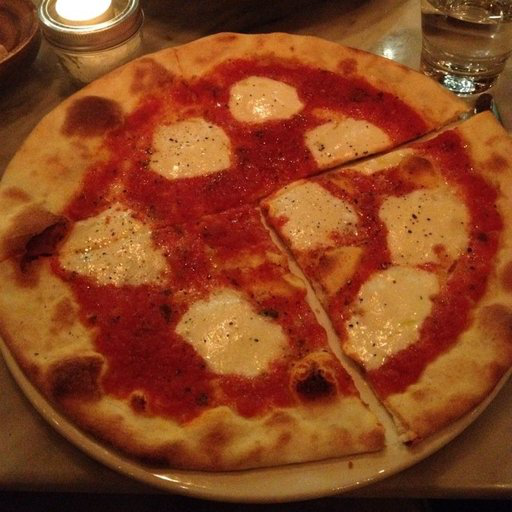

In [50]:
import random
from PIL import Image
# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f'Random Image Path: {random_image_path}\nImage Class: {image_class} \nImage Height: {img.height} \nImage Width: {img.width}')
print(image_class)
img

(-0.5, 511.5, 511.5, -0.5)

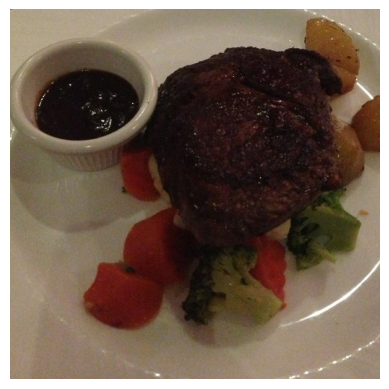

In [49]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.axis(False)

## **2. TRANSFORMING DATA**


In [56]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [59]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [61]:
train = datasets.ImageFolder(
    root=train_dir,
    transform = data_transform,
    target_transform=None
)

test = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)

train,test

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data1\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data1\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [74]:
class_names = train.classes
class_dict = train.class_to_idx

class_dict, class_names

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

In [64]:
len(train),len(test)

(225, 75)

In [70]:
img,label = train[0][0], train[1][1]
print(f'Image Tensor: {img}\nlabel: {class_names[label]}')

Image Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64])
New shape: torch.Size([64, 64, 3])


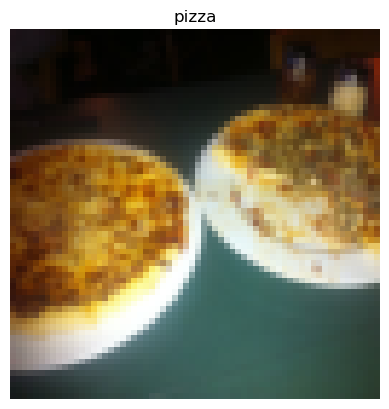

In [72]:
#rearrange the dimensions
img_permute = img.permute(1,2,0)
print(f'Original shape: {img.shape}\nNew shape: {img_permute.shape}')
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label]);

## **3. LOADING DATA**

In [75]:
!nvidia-smi

Tue Oct 22 16:07:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8              10W /  35W |     79MiB /  4096MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [78]:
BATCH_SIZE = 32
trainDataLoader = DataLoader(
    train,
    batch_size=BATCH_SIZE,
    shuffle=True    
)

testDataLoader = DataLoader(
    test,
    batch_size=BATCH_SIZE,
    shuffle=False
)

trainDataLoader, testDataLoader

(<torch.utils.data.dataloader.DataLoader at 0x10afa16e910>,
 <torch.utils.data.dataloader.DataLoader at 0x10afa065310>)

In [80]:
target_dir = train_dir
print(f"Target Dir: {target_dir}")
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])

Target Dir: data1\pizza_steak_sushi\train


In [83]:
class_names_found

['pizza', 'steak', 'sushi']

In [86]:
from helper_function import find_classes
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### *ImageFolder*

In [90]:
# $Sublclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # $Initialize out dataset
    def __init__(self, target_dir: str, transform = None):
        # $create a class attribute
        
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        
        # $Create Classes and class_to_idx attribute
        self.classes, self.class_to_idx = find_classes(target_dir)
        
        # $function to load image
        def load_image(self, index: int) -> Image.Image:
            
            """opens an image via path and returns it.

            Args:
                self (index): index of image

            Returns:
                Image.Image
            """
            image_path=self.paths[index]
            return Image.open(image_path)
        
        # $Overrite __len__()
        def __len__(self)->int:
            return len(self.paths)

        def __getitem__(self,index: int):
            img = self.load_image(index)
            class_name = self.paths[index].parent.name
            class_idx = self.class_to_idx[class_name]
            
        # $Transfom in necesssary
            if self.transform:
                return self.tansform(img), class_idx
            else:
                return img, class_idx

In [91]:
train

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data1\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )